---
# **Flight Price Aanalysis Prediction**


---
#### **data description :**
---
``Airline`` - The name of the airline is stored in the "Airline" column. This is a categorical feature inherent in 6 different airlines.

``Flight`` - stores information about the flight code of the aircraft. This is a categorical feature.

``Source City`` - The city from which the flight departs. This is a categorical feature that has 6 unique cities.

``Departure Time`` - Departure time. This is a derived categorical feature obtained by grouping time periods by cells.

``Stops`` - The number of stops between the cities of departure and destination. Categorical attribute with 3 different values

``Arrival Time`` - Arrival time. This is a derived categorical feature created by grouping time intervals by cells. It has six different timestamps.

``Destination City`` - The city where the flight will land. This is a categorical feature that has 6 unique cities.

``Class`` - Passenger class; it has two different meanings: Business and Economy.

``Duration`` - The total amount of time spent on a trip between cities in hours.

``Days Left`` - Subtracting the travel date from the booking date. That is, for how many days was the ticket booked

``Price`` - Ticket price (Target variable)


#### **Question to  answer**

* Does price vary with Airlines?
* How is the price affected when tickets are bought in just 1 or 2 days before departure?
* Does ticket price change based on the departure time and arrival time?
* How the price changes with change in Source and Destination?
* How does the ticket price vary between Economy and Business class?
---


#### **importing libraries**
---

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

---
### **data overview**
---

In [37]:
df =  pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [38]:
df_bus = pd.read_csv('business.csv')
df_eco = pd.read_csv('economy.csv')

In [39]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [41]:
len([col for col in df.columns if df[col].dtype == 'object' and len(df[col].unique()) < 10])

7

In [42]:
for col in [col for col in df.columns if df[col].dtype == 'object' and len(df[col].unique()) < 10]:
    print('-'*100)
    print("the columns name :",col)
    print(df[col].unique())

----------------------------------------------------------------------------------------------------
the columns name : airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
----------------------------------------------------------------------------------------------------
the columns name : source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
----------------------------------------------------------------------------------------------------
the columns name : departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
----------------------------------------------------------------------------------------------------
the columns name : stops
['zero' 'one' 'two_or_more']
----------------------------------------------------------------------------------------------------
the columns name : arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
-----------------------------------------------

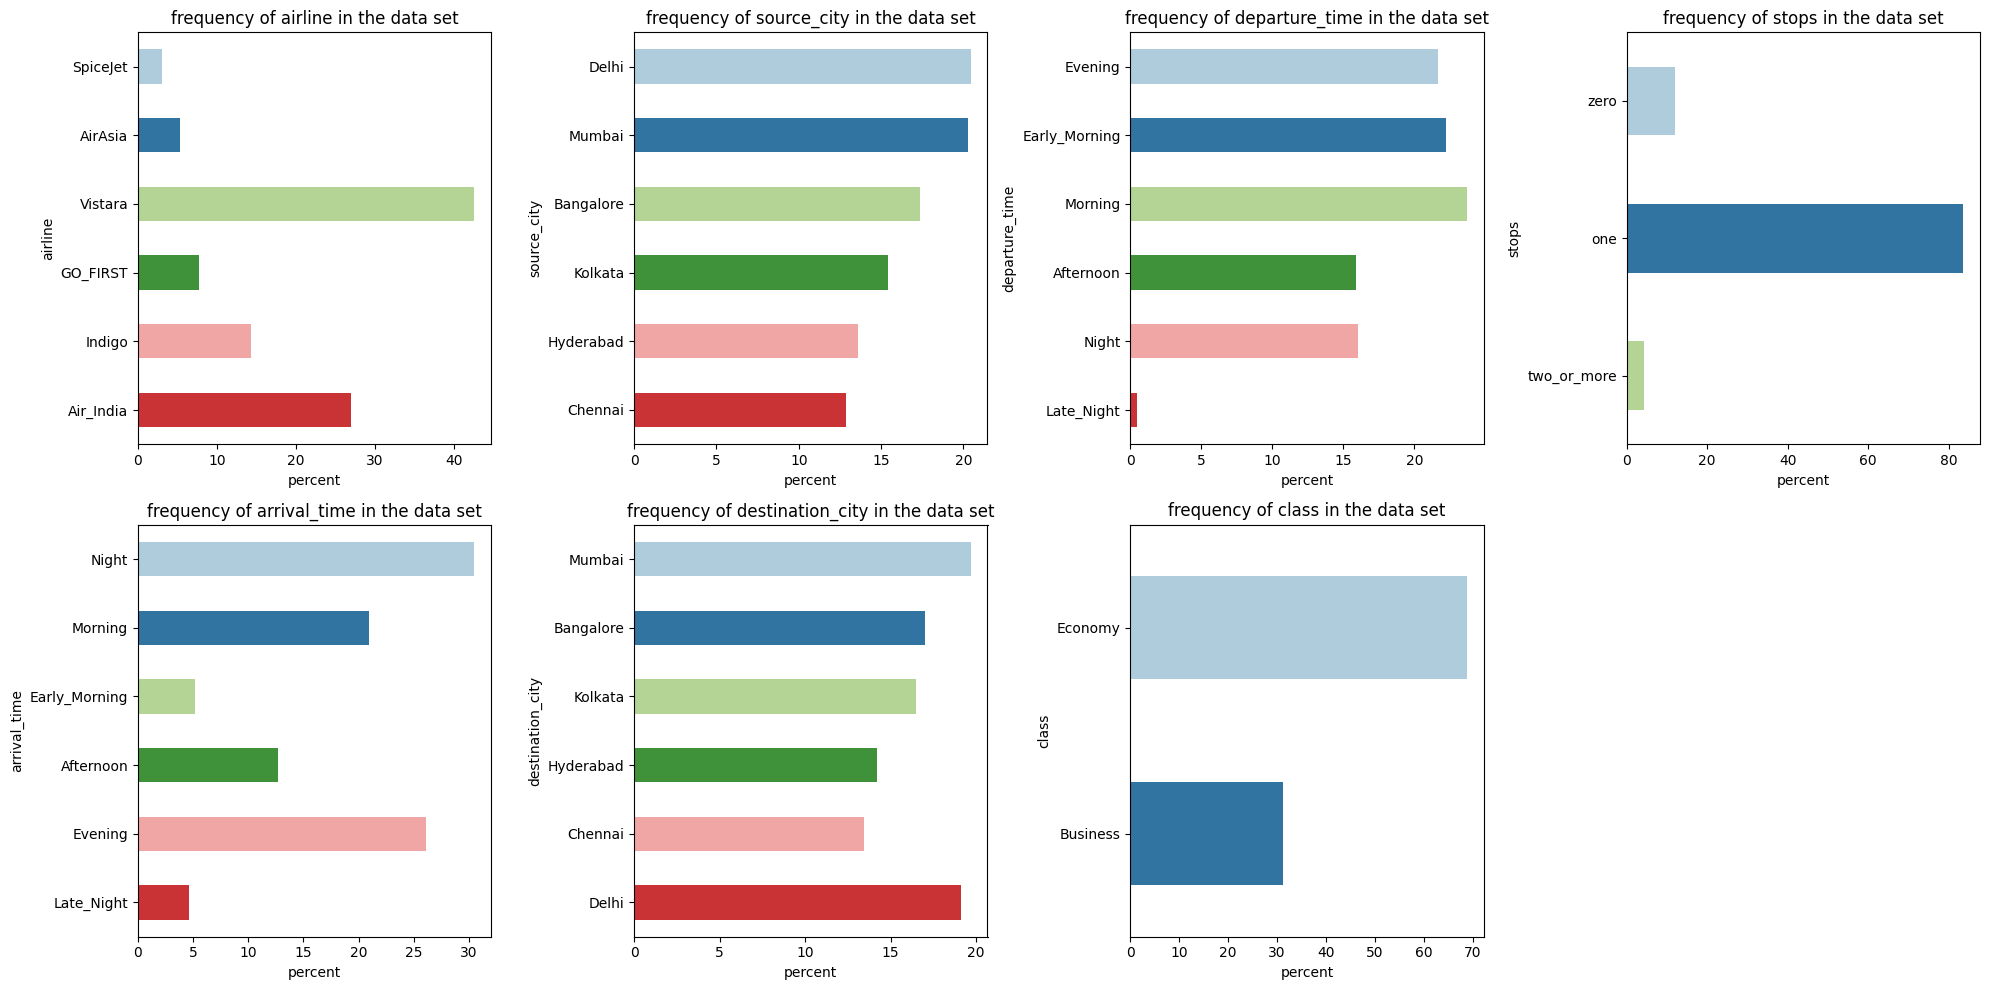

In [43]:
categ_col = [col for col in df.columns if df[col].dtype == 'object' and len(df[col].unique()) < 10]
fig, ax =  plt.subplots(2,4,figsize=(20,10))
ax = ax.flatten()
for i ,col in enumerate(categ_col):
    sns.countplot(df,y=col,hue=col,palette='Paired',ax=ax[i],stat='percent',width=0.5)
    ax[i].set_title(f'frequency of {col} in the data set')
for j in range(i+1,len(ax)):
        fig.delaxes(ax[j])  
plt.tight_layout()     


---
### **price sensibility to  the airline** 
---

In [44]:
std_price = df.groupby('airline')['price'].std().reset_index()
std_price

,airline,price
0,AirAsia,2824.055172
1,Air_India,20905.116909
2,GO_FIRST,2513.865560
3,Indigo,3268.894831
4,SpiceJet,2999.630406
5,Vistara,25637.159445


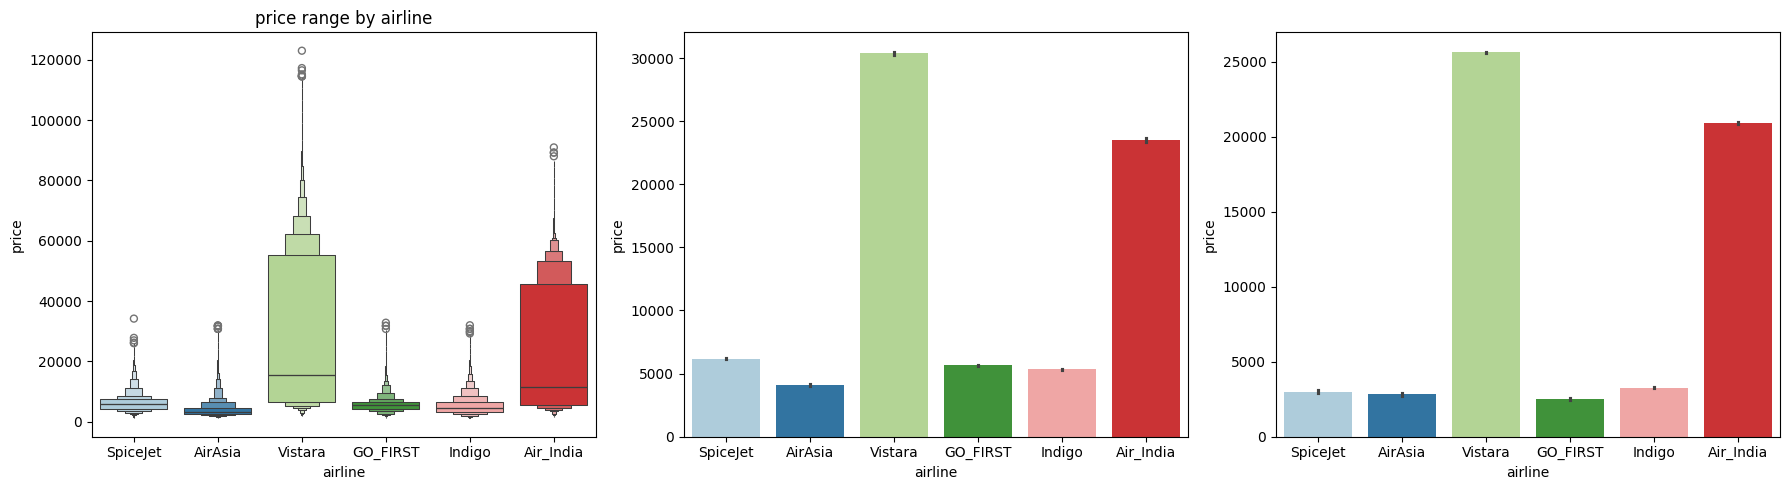

In [62]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxenplot(df,x="airline",y="price",hue='airline',palette='Paired')
plt.title('price range by airline')
plt.subplot(1,3,2)
sns.barplot(df,x="airline",y="price",hue='airline',palette='Paired',estimator=np.mean)
plt.subplot(1,3,3)
sns.barplot(df,x="airline",y="price",estimator=np.std,hue='airline',palette='Paired')
plt.tight_layout()

from the plots we can see that the ticket price is sensible to the airline so the cheapest flights are provided by ``Spicejet`` ``AirAsia`` ``Go_first`` ``Indigo`` where the max price is roughly the average  price in ``Vistra`` and ``Air India`` and the variation of price is bellow the 3500 in the last 4 airlines where in ``Vistara`` and ``Air_india`` the variance is between 25000 and 20000 in the ticket price 

In [70]:
df['price'].corr(df['days_left'])

np.float64(-0.0919485321714386)

In [82]:
price_days_left_eco = df[df['class']=='Economy'].groupby('days_left')['price'].mean().reset_index()
price_days_left_bus = df[df['class']=='Business'].groupby('days_left')['price'].mean().reset_index()

Text(0, 0.5, 'avg price')

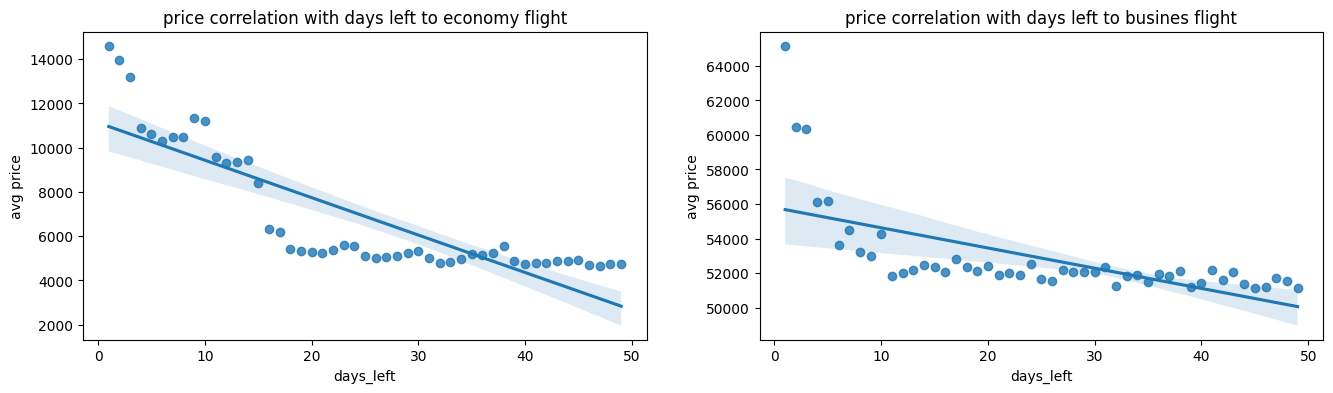

In [85]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title('price correlation with days left to economy flight')
sns.regplot(price_days_left_eco,x='days_left',y='price')
plt.ylabel('avg price')
plt.subplot(1,2,2)
plt.title('price correlation with days left to busines flight')
sns.regplot(price_days_left_bus,x='days_left',y='price')
plt.ylabel('avg price')

In [98]:
from scipy import  stats
for i , df in enumerate ([price_days_left_eco,price_days_left_bus]):
    pearson,p_value = stats.pearsonr(x=df['price'],y=df['days_left'])
    print(f'data number {i+1}')
    print('_'*40,'|')
    print(f'the person {i+1}',pearson)
    print(f'the p_value {i+1}',p_value)
    print('_'*40,'|')

data number 1
________________________________________ |
the person 1 -0.8449975450068995
the p_value 1 2.2756228935058635e-14
________________________________________ |
data number 2
________________________________________ |
the person 2 -0.6328508646988686
the p_value 2 1.0663703650593836e-06
________________________________________ |


from the regressin plots and the pearson coeficient we can see that there is a hight correlation between the days left to the flight and the price wher the urlier we book the cheapest the flight , also we dig into more factors by separting the data between economy flights and business flight and we found that in the economy flights the price is -0.84 correclated with the days left to the price this show a strong negative relationship btw price and days left variable but for business class flights the price is -0.63 correlated with 